# Exercise 2 - CNNs, ResNets and LR-Scheduling

 * Deep Learning for Computer Vision – Winter Term 2024/25

 * Lecture by: Constantin Pape

 * Tutors: Anwai Archit, Oleg Bakumenko, Luca Freckmann, Marei Freitag, Sarah Muth, Sushmita Nair

 * Due date: **Tuesday, Nov 19, before 10:00**

### Time required to solve this exercise sheet

**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

### Topics



In this exercise sheet, you will:

- work again with CIFAR-10

- implement a 1-layer CNN

- compare MLP and CNN

- vary architecture to improve model performance

- implement a ResNet for CIFAR-10

- learn about learning rate scheduling



*We are looking forward to seeing your solutions! Have fun!*

## IMPORTANT SUBMISSION INSTRUCTIONS



- **You need to answer all questions in written form!**

- When you've completed the exercise, download the notebook and rename it to `<surname1>_<surname2>_<surname3>.ipynb`

- Only submit the Jupyter Notebook (.ipynb file). No other file is required.

    - Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 2` -> `Tutorial X` (where, X is the tutorial you are assigned to).

- Make only one submission of the exercise per group.

- The deadline is strict.

- You have to present the exercise in the tutorials. We have a high ratio of students to tutors, so please decide which team member presents which part beforehand



Implementation:

- Do not change the cells which are marked as `DO NOT CHANGE`, similarly write your solution into the cells marked with TODOs for the questions asked.

### Imports

In [2]:
import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, StepLR

import torchvision

from torchvision import datasets, transforms, models

import fastprogress

import numpy as np

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt

import time

## 1. Setup



You can use the functions to grab the data, split the sets, create the dataloaders and plot results, etc. given to you at exercise sheet 1.



It is good practice to store functions that are constantly needed again in a separate file such that instead of copy-pasting the cells into each exercise notebook, you can use the python file containing the functions and import it in the notebooks.



If you work with Kaggle (recommended) you have to mount the drive first and create a path to your python module or download the file from your drive.

#### **TODO**

Create a file named `setup.py` with all the necessary functions. Download this file to your Kaggle workspace and import it on this notebook.



Hint: Use the package `gdown` to download files from google drive.



```python

!conda install -y gdown

!gdown <file_id>

```



Here's how to find the `file_id`: 

If the file URL is https://drive.google.com/file/d/1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk/view?usp=share_link



where, `file_id` is 2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk

In [3]:
# TODO: Download setup.py from google drive in Kaggle
!conda install -y gdown
#file_id = '2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk'
!gdown "https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk"

Channels:
 - defaults
 - nvidia
 - conda-forge
 - pytorch
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



C:\ProgramData\miniconda3\Lib\site-packages\conda\base\context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
Downloading...
From (original): https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk
From (redirected): https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk&confirm=t&uuid=444d11d4-60e5-4feb-ac22-f0f26c7231af
To: C:\Users\dadoi\DataspellProjects\Deep-Learning-Computer-Vision\setup.py

  0%|          | 0.00/16.1k [00:00<?, ?B/s]
100%|##########| 16.1k/16.1k [00:00<00:00, 2.78MB/s]


In [4]:
# TODO: Import setup.py
from setup import *

## 2. Load dataset, create dataloader, etc.



#### **TODO**

Call the functions of `setup.py` to instantiate the train-, test- and validation datasets along with their dataloaders.

In [5]:
# TODO: Define device
device = get_device()

In [6]:
data_dir = 'data'

batch_size = 256



# TODO: Grab data, generate split and initialize data loaders
trainset, testset = grab_data(data_dir)
trainset, valset = generate_train_val_data_split(trainset)
trainloader, valloader, testloader = init_data_loaders(trainset, valset, testset, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


#### **TODO** 

Define the loss function. We use the cross entropy loss again.

In [20]:
# TODO: Define loss function
loss_function = nn.CrossEntropyLoss()

## 3. Simple 1-layer CNN model

### **TODO**

- Define the model.



The first step to training a model is defining its architecture. 

Define a sequential model with following structure:

*   Convolutional layer with 32 filters, kernel size of 5*5 and stride of 1.

*   Max Pooling layer with kernel size of 2*2 and default stride.

*   ReLU Activation Layers.

*   Linear layer with output of 512.

*   ReLU Activation Layers.

*   A linear layer with output of 10.

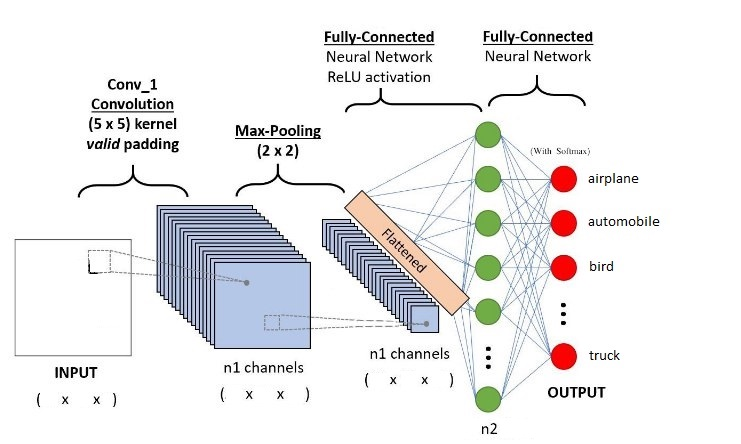

#### **Questions**



- What are the input dimensions?

- What are the dimensions of the feature maps?

- What are the dimensions after pooling?

- What is the size of each input (i.e value of `in_features`) to the first fully connected linear layer?

- What is the number of parameters for conv_1?

**Your answers here**

In [18]:
# TODO: Define model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 14 * 14, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

#### **TODO**



- Train the model for 10 epochs. Try lr=0.001 (can be changed to suit other design choices you make)

- Plot the results of accuracy and loss as you did in exercise sheet 1.

Finished training after 119 seconds.


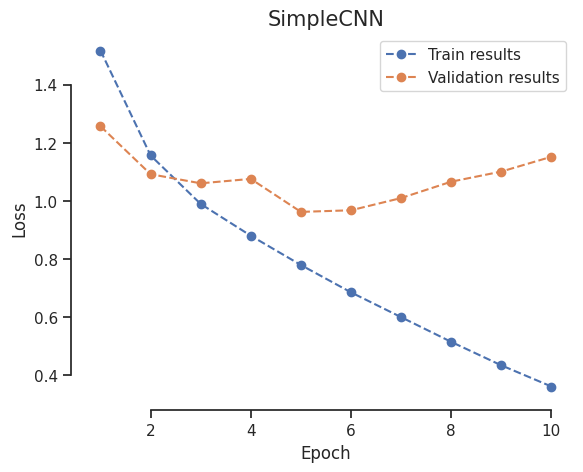

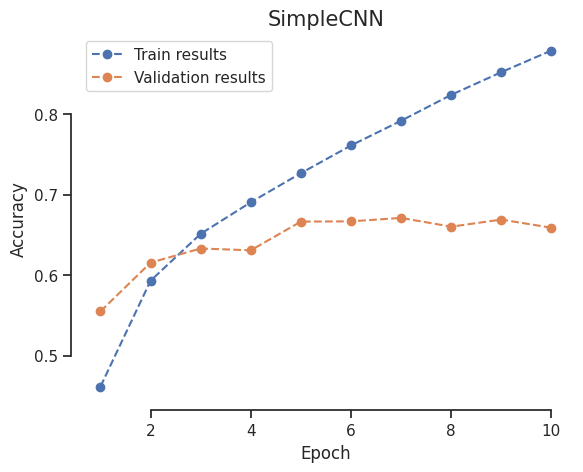

In [21]:
# TODO: Train and plot
model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, 10, trainloader, valloader)
plot("SimpleCNN", "Loss", train_losses, val_losses)
plot("SimpleCNN", "Accuracy", train_accs, val_accs)

#### **TODO**

Compare results to the MLP models you trained in Exercise 1. What can you observe?

**Your answers here**
The SimpleCNN with the Convolutional Layer is achieving better results, abve 60% accuracy on the first try, in one tenth of the time. 

The CNN architecture also seems to overfit after three epochs. The MLP overfitted after arround 10 epochs. This could be due to the fact that this CNN is better suited for image classification task.

**For your reference, below is the loss and accuracy plots of an MLP model trained in Exercise sheet 1:**

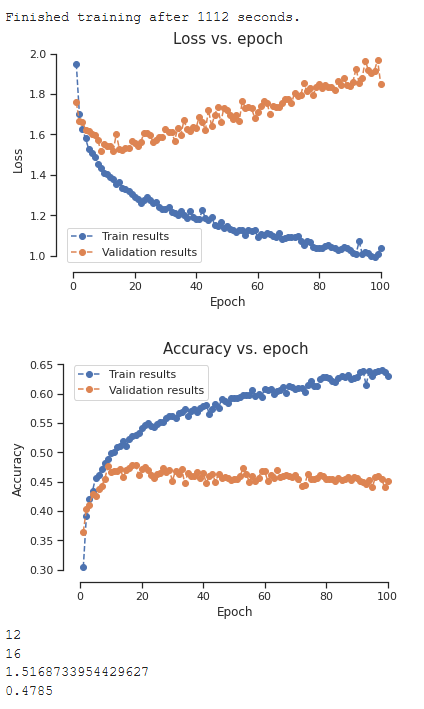

#### **TODO** 

Train longer (ca. 60 epochs), plot again.

Finished training after 708 seconds.


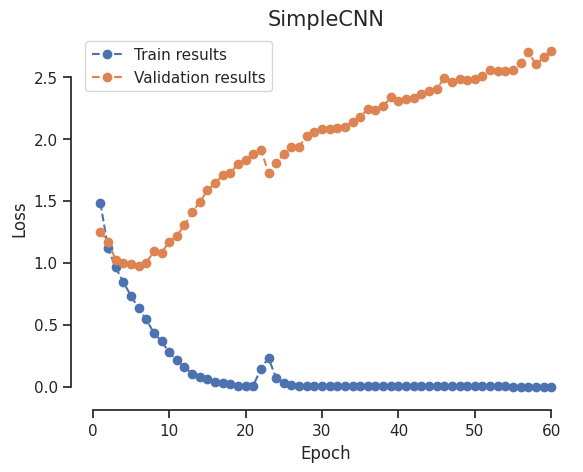

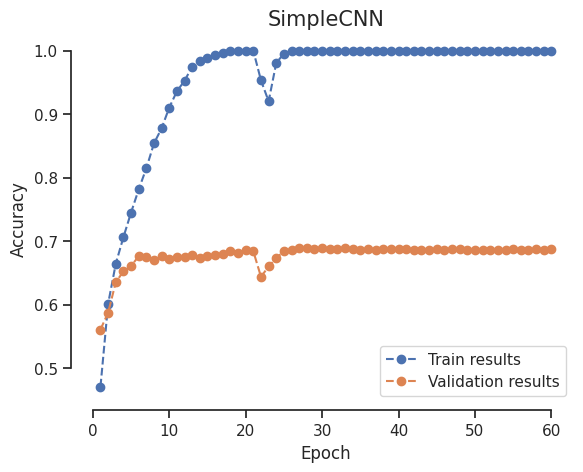

In [22]:
# TODO: Train and plot
model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, 60, trainloader, valloader)
plot("SimpleCNN", "Loss", train_losses, val_losses)
plot("SimpleCNN", "Accuracy", train_accs, val_accs)

#### **Questions**

- Why is that not an optimal model?

- What could be improved?

**Your answers here**
Since the model already overfitted after 3 epochs, 60 is way to mutch. The dataset is just noot big or complex enough to train on it for so long.

## 4. CNN model with more convolutional layers

#### **TODO**

Define the architecture using the following information:







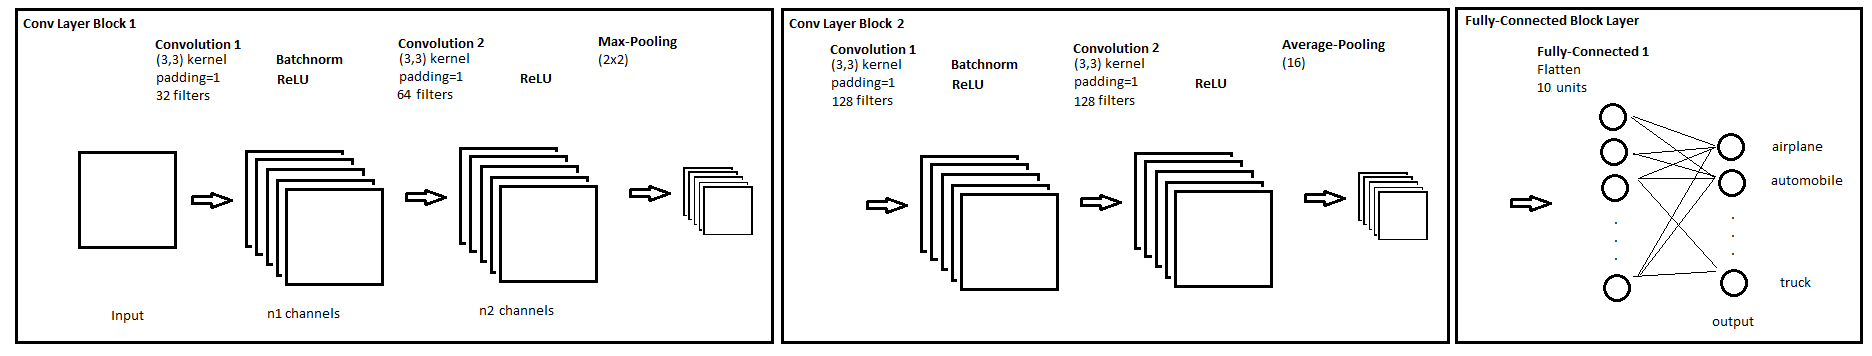

*   Convolutional layer 1: with 32 filters, kernel size of 3*3 and padding 1.

*   Batchnorm and ReLU layers

*   Convolutional layer 2: with 64 filters, kernel size of 3*3 and padding 1.

*   ReLU Activation layer

*   Max pooling with kernel size of 2*2

*   Convolutional layer 3: with 128 filters, kernel size of 3*3 and padding 1.

*   Batchnorm and ReLU layers

*   Convolutional layer 4: with 128 filters, kernel size of 3*3 and padding 1.

*   ReLU Activation layer

*   Average pooling with kernel size 16*16

*   Fully connected layer

#### **Questions**



- Padding is used in the convolutional layers. What does that mean, which variants exist and how does it influence the dimensions of the feature maps?

- What does padding=1 mean in the case of the network displayed above?

- What are the dimensions of the feature maps after the 1. conv layer?

- What are the dimensions of the feature maps after the 2. conv layer?

- What ist the receptive field size after the first two convolutions?

- What is the value for the in_features for the fully-connected layer?

- What is the number of parameters of *Conv Layer block 1*?

**Your answers here**

In [27]:
#TODO: Define model 2
# TODO: Define model
class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(),
            nn.Linear(8192, 10),
        )

    def forward(self, x):
        return self.model(x)

#### **TODO** 



- train the new net (30 epochs, try lr=0.1 or change as necessary), plot the results, and compare the results to the 1-layer CNN

- explain why you observe these results

Finished training after 437 seconds.


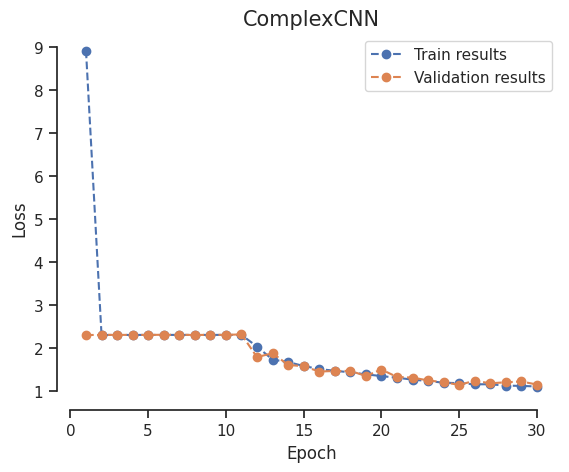

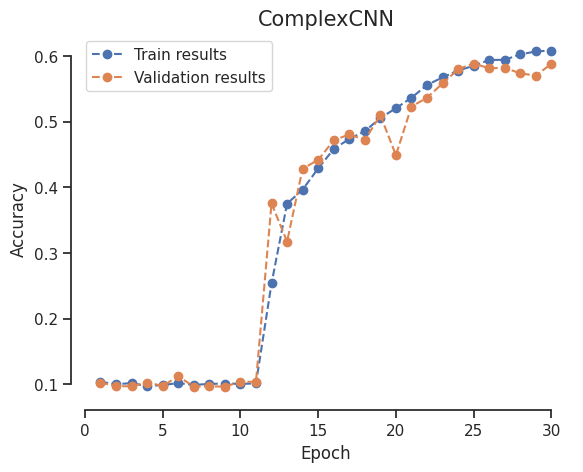

In [29]:
# TODO: Train and plot
model = ComplexCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, 30, trainloader, valloader)
plot("ComplexCNN", "Loss", train_losses, val_losses)
plot("ComplexCNN", "Accuracy", train_accs, val_accs)

Finished training after 434 seconds.


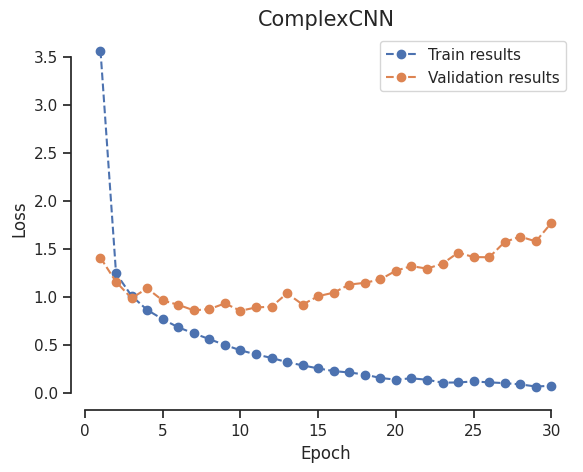

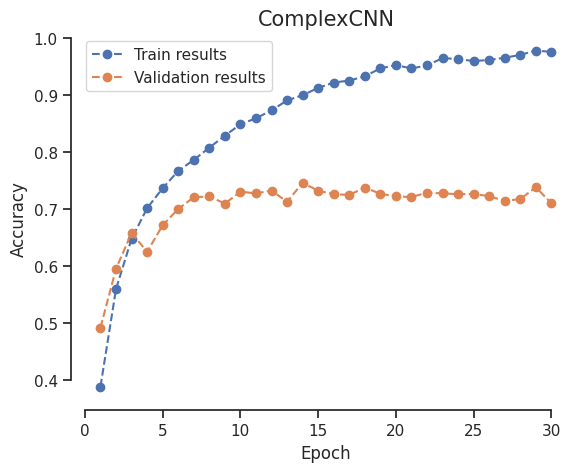

In [30]:
model = ComplexCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, 30, trainloader, valloader)
plot("ComplexCNN", "Loss", train_losses, val_losses)
plot("ComplexCNN", "Accuracy", train_accs, val_accs)

Finished training after 433 seconds.


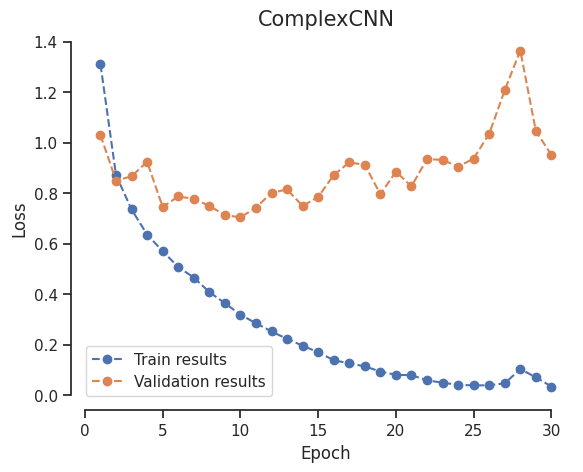

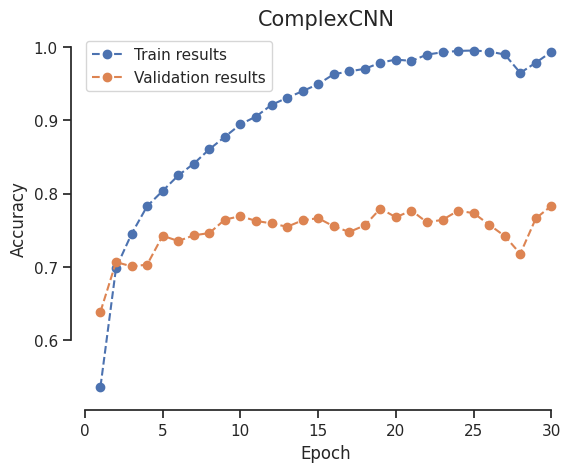

In [31]:
model = ComplexCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, 30, trainloader, valloader)
plot("ComplexCNN", "Loss", train_losses, val_losses)
plot("ComplexCNN", "Accuracy", train_accs, val_accs)

## 5. ResNet architecture



"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]



That was the intention of He et al. to develop residual networks.



A ResNet is built of blocks which are called the *Residual Blocks*. 

A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.

The Resnet skips connections via addition.



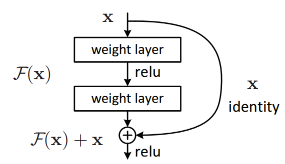

#### **Questions**

- Which problems do using skip connections solve?

- Why is a residual network called residual? 

**Your answers here**

#### **TODO**

- write a class **ResidualBlock(nn.Module)** where you define the blocks used in the ResNet

- write a class **ResNet(nn.Module)** where you define the model

- Train the model and plot results

- Train another model by disable residual connections and compare performance

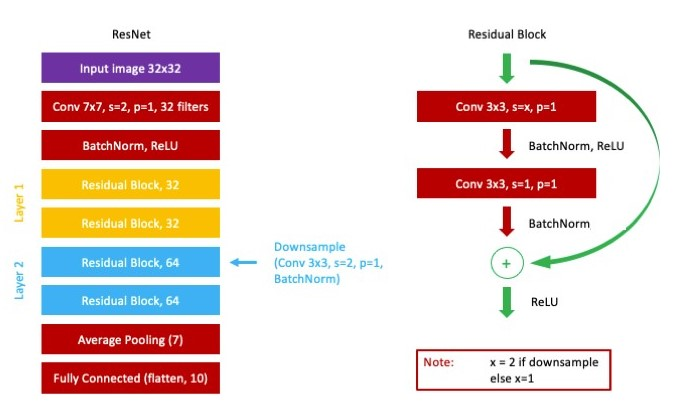

**Hints**



- The downsampling in this ResNet happens between layer 1 and layer 2. In this step, the channel size is increased (32 -> 64) and the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).

- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions.

- The average-pooling layer has kernel size 7.

- For you to ensure everything works fine, here are the shapes in the form [(batchsize), x, y, channel] where I discard batchsize, because it does not change.

32x32x3 -> conv 7x7 -> 14x14x32 -> layer 1 -> 14x14x32 -> layer2 -> 7x7x64 -> avpool(7) -> 1x1x64 -> linear(64, 10)

In [32]:
# TODO: Write a class ResidualBlock(nn.Module) where you define the blocks used in the ResNet
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, inside_channels, out_channels, downsample):
      super(ResidualBlock, self).__init__()
      self.x = 2 if downsample else 1
      self.relu = nn.ReLU(inplace=True)
      self.block = nn.Sequential(
            nn.Conv2d(in_channels, inside_channels, kernel_size=3, stride=self.x, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            nn.Conv2d(inside_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        outputs = x + self.block(x)
        return self.relu(outputs)

In [ ]:
# TODO: Write a class ResNet(nn.Module) where you define the model
class ResNet(nn.Module):
    def __init__(self, in_channels, inside_channels, out_channels, downsample):
      super(ResidualBlock, self).__init__()
      self.model = nn.Sequential(
            
      )

In [ ]:
# TODO: Train ResNet using the architecture laid out in the comments and figures above. Plot loss and accuracy for training and validation set.

In [ ]:
# TODO: Train another model by disabling all residual connections. Plot loss and accuracy curves for training and validation set.

#### **Questions**

- Does using residual connections result in better performance in this exercise? If yes, why? If not, when would the benefit of using ResNet be most visible?

- In deeper networks, how would you expect residual blocks to influence training time? why?

- Compare the performance and training time of your ResNet with the CNNs you trained in the previous section.

**Your answers here**

## 6. Explore Learning Rate Scheduling



Learning rate scheduling is a mechanism to adjust the learning rate.



*`torch.optim.lr_scheduler`* provides several methods based on the number of epochs. Learning rate scheduling should be applied after optimizer’s update.

#### **TODO**

- change run_training and extend to use scheduler for learning rate

- use `StepLR` (https://pytorch.org/docs/stable/optim.html), use the ResNet, train for 10 epochs. Start with a learning rate of 0.1.



#### **Questions**



- Try step size 1, gamma 0.1

    - How does it change the learning rate?

    - what do you observe regarding performance?

- Try step size 1, gamma 0.9, what do you observe?

    - How does it change the learning rate?

    - what do you observe regarding performance?

- What can you conclude of this experiment regarding the synergy of step size and gamma to get a good schedule?

**Your answers here**

In [ ]:
# TODO: Change run_training (you can copy the code from setup.py here and create a new method here 

# or just change/create a new method it in the python file)

In [ ]:
# TODO: Train and plot with step size 1, gamma 0.1

In [ ]:
# TODO: Train and plot with step size 1, gamma 0.9

#### **TODO** 



Use step size 15, gamma 0.1. Train for 30 epochs.

In [ ]:
# TODO: Train and plot with step size 15, gamma 0.1, 30 epochs.

#### **Questions**

- Does it improve performance?

- What can you observe in the plots?

**Your answers here**

## 7. LR-Scheduling _(Optional)_

#### TODO _(Optional)_

- try two more scheduler: ExponentialLR and ReduceLROnPlateau 

- vary the parameters, which work best?

- does it improve performance compared to no scheduler?

- does it improve performance compared to StepLR?

In [ ]:
# TODO (Optional): Train and plot with different schedulers

**Your answers here**